Abdelrahman Bassem ALI

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import silhouette_score

In [4]:
# Load the dataset
cdata = pd.read_csv('/content/Mall_Customers.csv')
print(cdata .head())
cdata.info()
# Get summary statistics
print(cdata.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
       CustomerID         Age  Annual Income (k$)  Spend

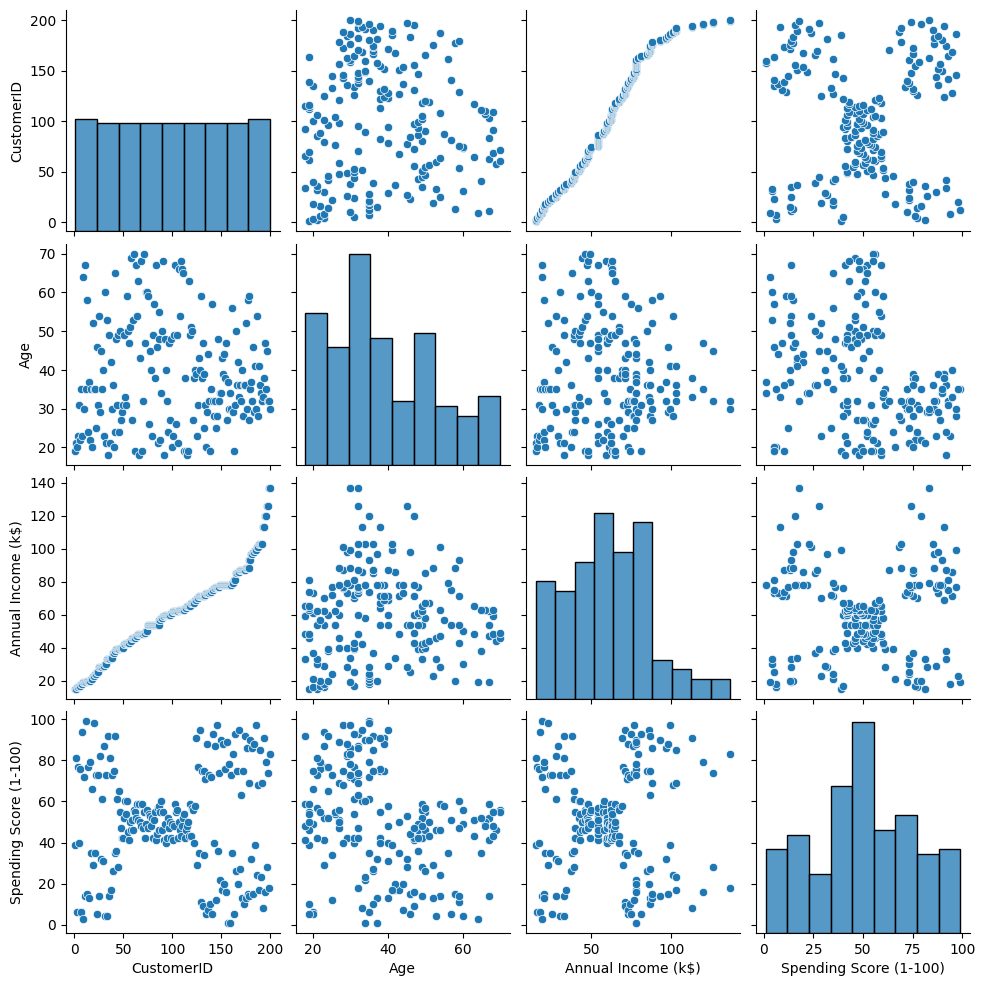

In [5]:
# Visualize the distribution of features
sns.pairplot(cdata)
plt.show()

In [6]:
# Check for missing values and handle them if necessary
print(cdata.isnull().sum())
cdata['Gender'].mode()
# Convert categorical variables to numerical
label_encoder = LabelEncoder()
cdata['Gender'] = label_encoder.fit_transform(cdata['Gender'])
cdata

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [7]:
# Select the features for clustering
features = cdata [['Age', 'Gender','Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
# Drop any unnecessary columns
cdata = cdata.drop(['CustomerID'], axis=1)

In [9]:
# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [10]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

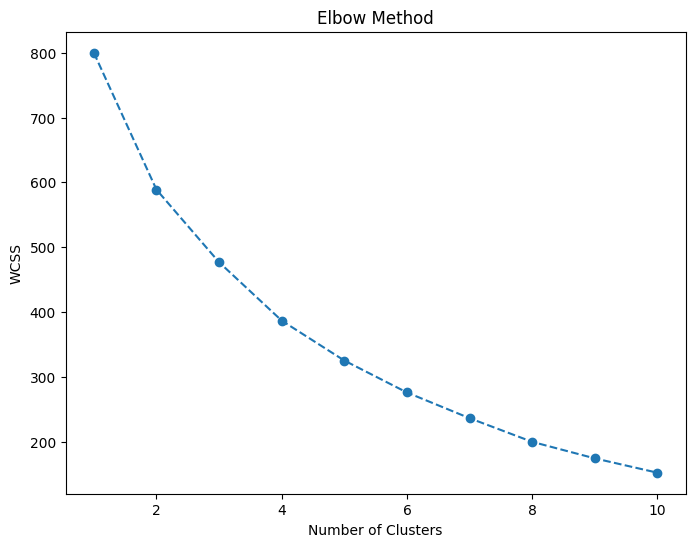

In [11]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Choose the optimal number of clusters (k)
k = 6
# Apply K-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cdata['Cluster'] = kmeans.fit_predict(features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
# Display the cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features.columns)
print(cluster_centers)

         Age        Gender  Annual Income (k$)  Spending Score (1-100)
0  37.769231  5.000000e-01           91.461538               16.115385
1  25.945946  1.665335e-16           42.216216               57.459459
2  55.628571  1.000000e+00           52.828571               36.200000
3  50.609756  0.000000e+00           49.658537               40.146341
4  28.105263  1.000000e+00           58.342105               71.315789
5  32.086957  8.695652e-02           90.000000               81.391304


In [17]:
# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(features_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3336281031933481


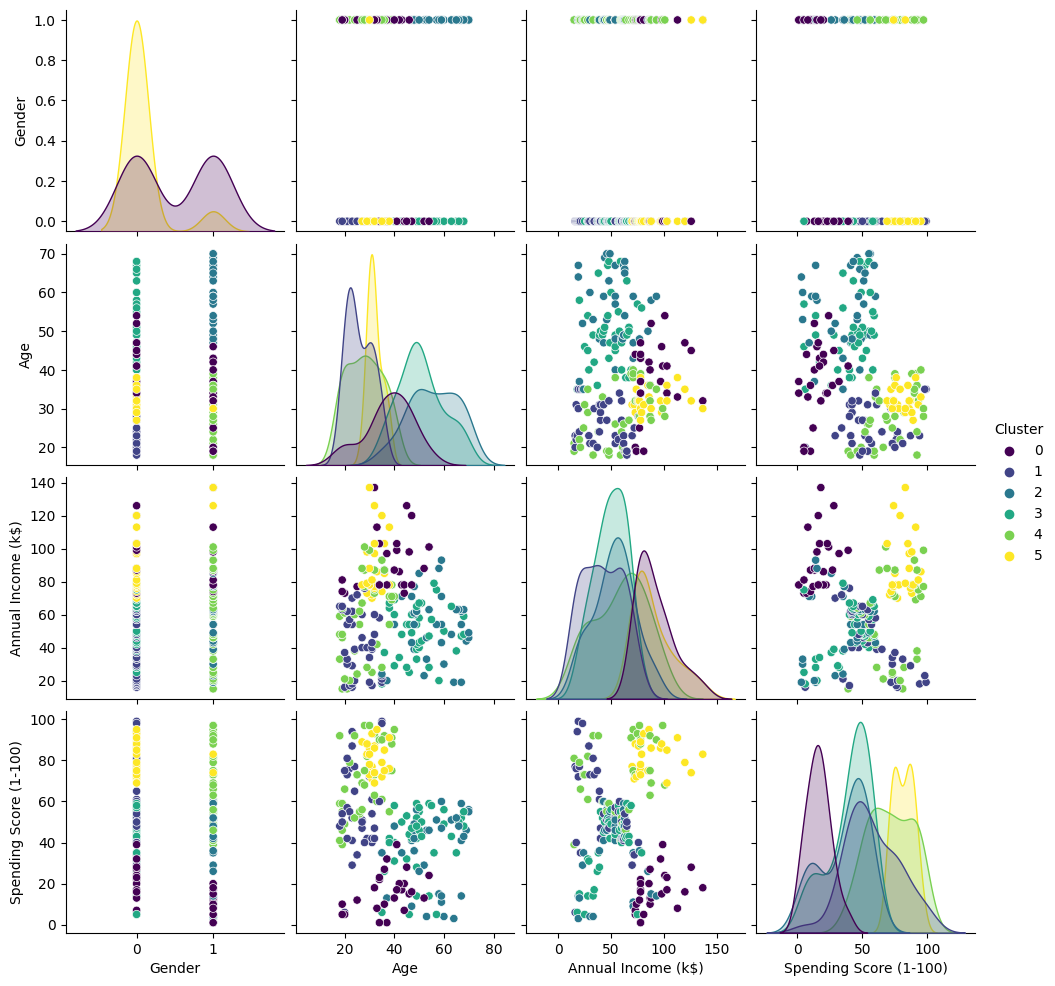

In [19]:
# Visualize the clusters
sns.pairplot(cdata, hue='Cluster', palette='viridis')
plt.show()

another way

In [21]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [22]:
# Select relevant features for segmentation
x = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [23]:
# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(x)

In [25]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_standardized)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

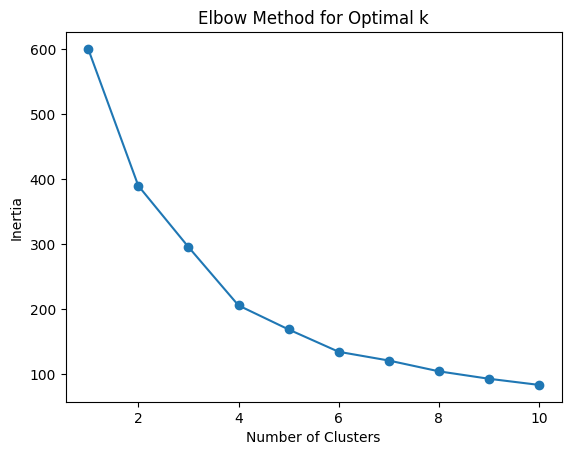

In [26]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [27]:
# Based on the Elbow Method, choose the optimal number of clusters (k)
optimal_k =6

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_standardized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_standardized)
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

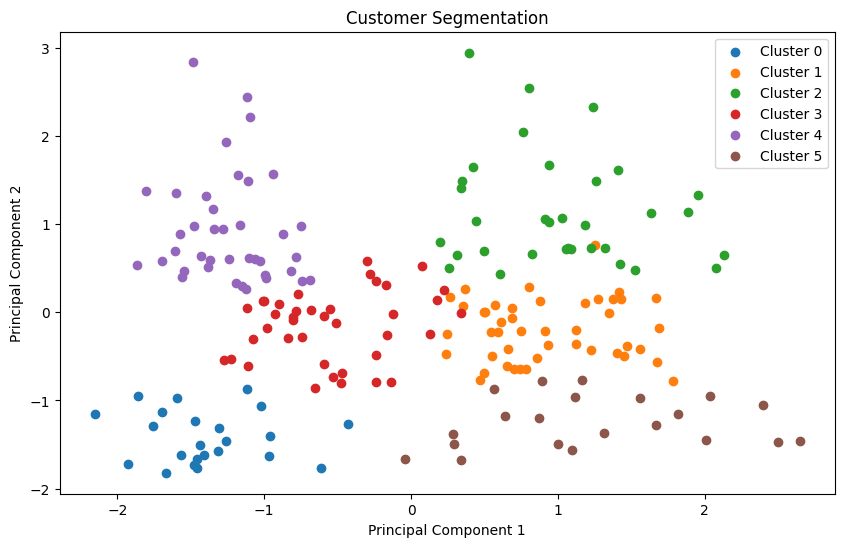

In [29]:
# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

In [30]:
# Display the characteristics of each cluster
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         22.130435  25.000000           25.260870               77.608696   
1         83.777778  56.333333           54.266667               49.066667   
2        165.303030  41.939394           88.939394               16.969697   
3         91.307692  26.794872           57.102564               48.128205   
4        162.000000  32.692308           86.538462               82.128205   
5         23.190476  45.523810           26.285714               19.380952   

              PC1       PC2  
Cluster                      
0       -1.388847 -1.415927  
1        0.928920 -0.200452  
2        1.015629  1.137374  
3       -0.547994 -0.154853  
4       -1.235118  0.930282  
5        1.246081 -1.247069  


<ipython-input-30-0c1fb356ff1b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('Cluster').mean()
